In [1]:
!pip install geopandas

In [2]:
!pip install plotly_express

In [3]:
!pip install folium

In [4]:
!pip install tensorflow

In [5]:
#import ray


import time
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly_express as px
import tensorflow as tf
import folium

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [6]:
#import dataset
db = pd.read_csv("tracklets.csv")
db

,idtracklet|id1|mmsi1|speed1|course1|heading1|lon1|lat1|ts1|id2|mmsi2|speed2|course2|heading2|lon2|lat2|ts2|id3|mmsi3|speed3|course3|heading3|lon3|lat3|ts3|id4|mmsi4|speed4|course4|heading4|lon4|lat4|ts4|id5|mmsi5|speed5|course5|heading5|lon5|lat5|ts5|route
0,1|4128997|228005700|6.7|175|511|-4.551695|48.3...
1,2|14817869|249104000|8.7|69|69|-4.733975|48.30...
2,3|8618319|228017700|14.6|83.7|86|-4.885512|48....
3,4|16024159|227008170|12.3|125|126|-4.924165|48...
4,5|2144526|228017700|16.5|73.4|73|-4.550415|48....
...,...
795,796|3554186|227730220|19.1|56.9|511|-4.639665|...
796,797|1585479|227005550|23.1|68.9|511|-4.547798|...
797,798|2761022|258316000|12.1|338|332|-5.186498|4...
798,799|5167729|228186700|10.9|104|103|-4.465165|4...


In [7]:
#re-import dataset and set delimiter
db = pd.read_csv("tracklets.csv", sep="|")
db

,idtracklet,id1,mmsi1,speed1,course1,heading1,lon1,lat1,ts1,id2,...,ts4,id5,mmsi5,speed5,course5,heading5,lon5,lat5,ts5,route
0,1,4128997,228005700,6.7,175.0,511,-4.551695,48.344520,1447148032,4129047,...,1447148121,4129188,228005700,3.9,325.8,511,-4.551893,48.343353,1447148153,R_07
1,2,14817869,249104000,8.7,69.0,69,-4.733975,48.301247,1456438812,14817884,...,1456438842,14817927,249104000,8.5,68.5,69,-4.731818,48.301840,1456438851,R_14
2,3,8618319,228017700,14.6,83.7,86,-4.885512,48.404390,1451215056,8618323,...,1451215075,8618335,228017700,14.7,84.3,88,-4.882973,48.404560,1451215081,R_01
3,4,16024159,227008170,12.3,125.0,126,-4.924165,48.405033,1457099514,16024163,...,1457099527,16024186,227008170,12.4,130.0,119,-4.922998,48.404335,1457099531,R_11
4,5,2144526,228017700,16.5,73.4,73,-4.550415,48.351140,1445447976,2144611,...,1445448112,2144738,228017700,16.0,72.7,71,-4.535050,48.354515,1445448122,R_06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,3554186,227730220,19.1,56.9,511,-4.639665,48.315987,1446681907,3554191,...,1446681925,3554214,227730220,19.5,55.2,511,-4.636951,48.317173,1446681932,R_0
796,797,1585479,227005550,23.1,68.9,511,-4.547798,48.351620,1444922333,1585481,...,1444922338,1585485,227005550,23.2,69.3,511,-4.547202,48.351772,1444922338,R_0
797,798,2761022,258316000,12.1,338.0,332,-5.186498,48.084835,1445959658,2761038,...,1445959718,2761117,258316000,12.2,337.0,333,-5.188832,48.088500,1445959727,R_0
798,799,5167729,228186700,10.9,104.0,103,-4.465165,48.318333,1448009887,5167735,...,1448009892,5167744,228186700,10.9,105.0,101,-4.464665,48.318165,1448009893,R_0


In [8]:
#examine dataset
print("---cc---")
print(db.info())

---cc---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   idtracklet  800 non-null    int64  
 1   id1         800 non-null    int64  
 2   mmsi1       800 non-null    int64  
 3   speed1      800 non-null    float64
 4   course1     800 non-null    float64
 5   heading1    800 non-null    int64  
 6   lon1        800 non-null    float64
 7   lat1        800 non-null    float64
 8   ts1         800 non-null    int64  
 9   id2         800 non-null    int64  
 10  mmsi2       800 non-null    int64  
 11  speed2      800 non-null    float64
 12  course2     800 non-null    float64
 13  heading2    800 non-null    int64  
 14  lon2        800 non-null    float64
 15  lat2        800 non-null    float64
 16  ts2         800 non-null    int64  
 17  id3         800 non-null    int64  
 18  mmsi3       800 non-null    int64  
 19  speed3      800 non-

In [9]:
print("Tracklets Rows: ", db.shape[0])
print("Tracklets Columns: ", db.shape[1])

Tracklets Rows:  800
Tracklets Columns:  42


<Axes: >

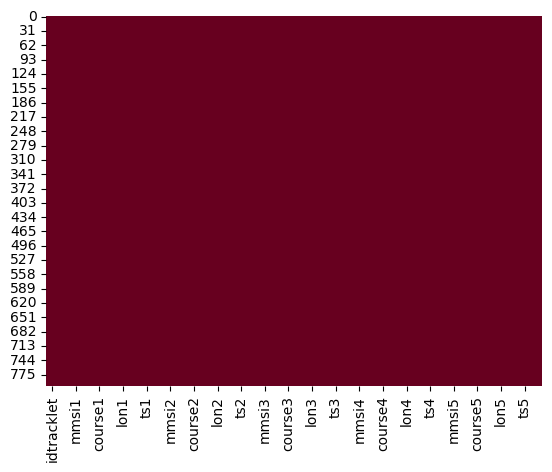

In [10]:
#heatmap to detect null values
sns.heatmap(db.isnull(), cmap="RdBu", cbar=False)

In [11]:
#drop potential na values
db.dropna(inplace=True)
db

,idtracklet,id1,mmsi1,speed1,course1,heading1,lon1,lat1,ts1,id2,...,ts4,id5,mmsi5,speed5,course5,heading5,lon5,lat5,ts5,route
0,1,4128997,228005700,6.7,175.0,511,-4.551695,48.344520,1447148032,4129047,...,1447148121,4129188,228005700,3.9,325.8,511,-4.551893,48.343353,1447148153,R_07
1,2,14817869,249104000,8.7,69.0,69,-4.733975,48.301247,1456438812,14817884,...,1456438842,14817927,249104000,8.5,68.5,69,-4.731818,48.301840,1456438851,R_14
2,3,8618319,228017700,14.6,83.7,86,-4.885512,48.404390,1451215056,8618323,...,1451215075,8618335,228017700,14.7,84.3,88,-4.882973,48.404560,1451215081,R_01
3,4,16024159,227008170,12.3,125.0,126,-4.924165,48.405033,1457099514,16024163,...,1457099527,16024186,227008170,12.4,130.0,119,-4.922998,48.404335,1457099531,R_11
4,5,2144526,228017700,16.5,73.4,73,-4.550415,48.351140,1445447976,2144611,...,1445448112,2144738,228017700,16.0,72.7,71,-4.535050,48.354515,1445448122,R_06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,3554186,227730220,19.1,56.9,511,-4.639665,48.315987,1446681907,3554191,...,1446681925,3554214,227730220,19.5,55.2,511,-4.636951,48.317173,1446681932,R_0
796,797,1585479,227005550,23.1,68.9,511,-4.547798,48.351620,1444922333,1585481,...,1444922338,1585485,227005550,23.2,69.3,511,-4.547202,48.351772,1444922338,R_0
797,798,2761022,258316000,12.1,338.0,332,-5.186498,48.084835,1445959658,2761038,...,1445959718,2761117,258316000,12.2,337.0,333,-5.188832,48.088500,1445959727,R_0
798,799,5167729,228186700,10.9,104.0,103,-4.465165,48.318333,1448009887,5167735,...,1448009892,5167744,228186700,10.9,105.0,101,-4.464665,48.318165,1448009893,R_0


<Axes: >

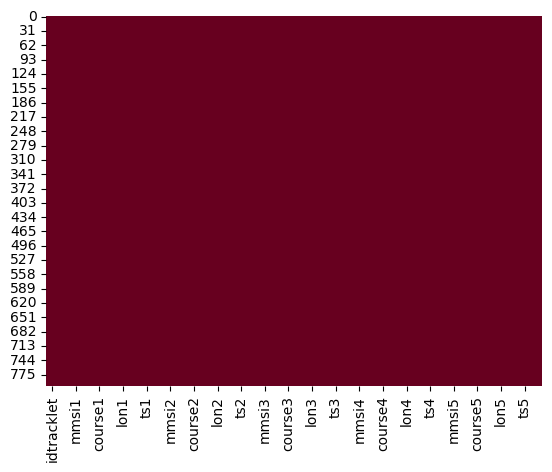

In [12]:
#heatmap to detect null values
sns.heatmap(db.isnull(), cmap="RdBu", cbar=False)

In [13]:
#only needed if you need to read the UNIX timestamps

#process timestamps to human readable format
#db['ts1'] = pd.to_datetime(db['ts1'], unit='s')
#db['ts2'] = pd.to_datetime(db['ts2'], unit='s')
#db['ts3'] = pd.to_datetime(db['ts3'], unit='s')
#db['ts4'] = pd.to_datetime(db['ts4'], unit='s')
#db['ts5'] = pd.to_datetime(db['ts5'], unit='s')
#db

In [14]:
#introduce a correlation matrix
cm = db.corr()

C:\Users\strid\AppData\Local\Temp\ipykernel_11736\1278685546.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = db.corr()


In [15]:
#feature and target selection
features = ['speed1', 'course1', 'heading1', 'ts1', 'speed2', 'course2', 'heading2', 'ts2', 'speed3', 'course3', 'heading3', 'ts3', 'speed4', 'course4', 'heading4', 'ts4', 'speed5', 'course5', 'heading5', 'ts5']  
targets = ['lon1', 'lat1']  

x = db[features]
y = db[targets]

original_lon1 = db["lon1"]
original_lat1 = db["lat1"]

In [16]:
#examine x then y
x

,speed1,course1,heading1,ts1,speed2,course2,heading2,ts2,speed3,course3,heading3,ts3,speed4,course4,heading4,ts4,speed5,course5,heading5,ts5
0,6.7,175.0,511,1447148032,6.9,175.5,511,1447148061,2.8,215.6,511,1447148092,2.1,337.5,511,1447148121,3.9,325.8,511,1447148153
1,8.7,69.0,69,1456438812,8.5,69.1,68,1456438821,8.5,68.3,69,1456438832,8.6,67.9,69,1456438842,8.5,68.5,69,1456438851
2,14.6,83.7,86,1451215056,14.7,83.7,86,1451215063,14.7,83.8,86,1451215069,14.6,84.1,87,1451215075,14.7,84.3,88,1451215081
3,12.3,125.0,126,1457099514,12.6,130.0,125,1457099516,12.8,132.0,124,1457099521,12.5,131.0,121,1457099527,12.4,130.0,119,1457099531
4,16.5,73.4,73,1445447976,16.0,70.3,69,1445448036,15.8,70.5,71,1445448052,16.1,72.8,73,1445448112,16.0,72.7,71,1445448122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,19.1,56.9,511,1446681907,19.5,57.7,511,1446681913,19.9,59.2,511,1446681919,19.0,55.4,511,1446681925,19.5,55.2,511,1446681932
796,23.1,68.9,511,1444922333,23.2,69.1,511,1444922335,23.2,69.3,511,1444922337,23.2,69.7,511,1444922338,23.2,69.3,511,1444922338
797,12.1,338.0,332,1445959658,12.1,338.0,332,1445959667,12.2,338.0,332,1445959677,12.2,337.0,333,1445959718,12.2,337.0,333,1445959727
798,10.9,104.0,103,1448009887,10.9,104.0,102,1448009889,10.9,105.0,102,1448009890,10.9,107.0,101,1448009892,10.9,105.0,101,1448009893


In [17]:
y

,lon1,lat1
0,-4.551695,48.344520
1,-4.733975,48.301247
2,-4.885512,48.404390
3,-4.924165,48.405033
4,-4.550415,48.351140
...,...,...
795,-4.639665,48.315987
796,-4.547798,48.351620
797,-5.186498,48.084835
798,-4.465165,48.318333


In [18]:
#split dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=256)

In [19]:
#scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
#fit the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(len(features),)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(2)  # 2 output neurons for longitude and latitude
])

#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#train the model
model.fit(X_train_scaled, y_train, epochs=1000, batch_size=12, validation_split=0.2)

Epoch 1/1000
38/38 [==============================] - 8s 29ms/step - loss: 1172.0048 - val_loss: 1166.6090
Epoch 2/1000
38/38 [==============================] - 0s 8ms/step - loss: 1108.3752 - val_loss: 540.4412
Epoch 3/1000
38/38 [==============================] - 0s 7ms/step - loss: 360.0225 - val_loss: 286.3907
Epoch 4/1000
38/38 [==============================] - 0s 9ms/step - loss: 246.8017 - val_loss: 230.9465
Epoch 5/1000
38/38 [==============================] - 0s 7ms/step - loss: 178.2530 - val_loss: 162.8701
Epoch 6/1000
38/38 [==============================] - 0s 8ms/step - loss: 134.1982 - val_loss: 123.3490
Epoch 7/1000
38/38 [==============================] - 0s 10ms/step - loss: 100.9307 - val_loss: 93.7211
Epoch 8/1000
38/38 [==============================] - 0s 10ms/step - loss: 77.5676 - val_loss: 75.5071
Epoch 9/1000
38/38 [==============================] - 0s 7ms/step - loss: 59.7787 - val_loss: 61.7391
Epoch 10/1000
38/38 [==============================] - 0s 10ms/

38/38 [==============================] - 0s 8ms/step - loss: 0.4939 - val_loss: 1.2409
Epoch 82/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3849 - val_loss: 0.8181
Epoch 83/1000
38/38 [==============================] - 0s 8ms/step - loss: 0.4455 - val_loss: 1.0265
Epoch 84/1000
38/38 [==============================] - 0s 10ms/step - loss: 0.2282 - val_loss: 0.8795
Epoch 85/1000
38/38 [==============================] - 0s 9ms/step - loss: 0.1875 - val_loss: 1.0472
Epoch 86/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.2322 - val_loss: 1.0164
Epoch 87/1000
38/38 [==============================] - 0s 10ms/step - loss: 0.2353 - val_loss: 0.9434
Epoch 88/1000
38/38 [==============================] - 0s 11ms/step - loss: 0.1897 - val_loss: 0.7905
Epoch 89/1000
38/38 [==============================] - 1s 15ms/step - loss: 0.2494 - val_loss: 1.3967
Epoch 90/1000
38/38 [==============================] - 0s 9ms/step - loss: 0.1677 - val_loss: 1.1033


38/38 [==============================] - 0s 9ms/step - loss: 0.3394 - val_loss: 0.7830
Epoch 162/1000
38/38 [==============================] - 0s 11ms/step - loss: 0.2385 - val_loss: 0.5542
Epoch 163/1000
38/38 [==============================] - 0s 10ms/step - loss: 0.1813 - val_loss: 0.5225
Epoch 164/1000
38/38 [==============================] - 0s 8ms/step - loss: 0.1298 - val_loss: 0.7436
Epoch 165/1000
38/38 [==============================] - 0s 8ms/step - loss: 0.2718 - val_loss: 0.6424
Epoch 166/1000
38/38 [==============================] - 0s 8ms/step - loss: 0.1543 - val_loss: 0.4923
Epoch 167/1000
38/38 [==============================] - 0s 8ms/step - loss: 0.0923 - val_loss: 0.5138
Epoch 168/1000
38/38 [==============================] - 0s 10ms/step - loss: 0.0876 - val_loss: 0.5729
Epoch 169/1000
38/38 [==============================] - 0s 9ms/step - loss: 0.0615 - val_loss: 0.5974
Epoch 170/1000
38/38 [==============================] - 0s 8ms/step - loss: 0.1069 - val_loss:

38/38 [==============================] - 0s 10ms/step - loss: 0.6112 - val_loss: 0.8489
Epoch 242/1000
38/38 [==============================] - 0s 8ms/step - loss: 0.3925 - val_loss: 1.1158
Epoch 243/1000
38/38 [==============================] - 0s 10ms/step - loss: 0.3468 - val_loss: 0.5585
Epoch 244/1000
38/38 [==============================] - 0s 8ms/step - loss: 0.1656 - val_loss: 0.4620
Epoch 245/1000
38/38 [==============================] - 0s 8ms/step - loss: 0.1026 - val_loss: 0.4404
Epoch 246/1000
38/38 [==============================] - 0s 8ms/step - loss: 0.0742 - val_loss: 0.3862
Epoch 247/1000
38/38 [==============================] - 0s 8ms/step - loss: 0.0720 - val_loss: 0.4239
Epoch 248/1000
38/38 [==============================] - 0s 9ms/step - loss: 0.0768 - val_loss: 0.3764
Epoch 249/1000
38/38 [==============================] - 0s 9ms/step - loss: 0.0564 - val_loss: 0.3922
Epoch 250/1000
38/38 [==============================] - 0s 9ms/step - loss: 0.0570 - val_loss: 

38/38 [==============================] - 0s 7ms/step - loss: 0.0485 - val_loss: 0.6135
Epoch 322/1000
38/38 [==============================] - 0s 11ms/step - loss: 0.1353 - val_loss: 0.3012
Epoch 323/1000
38/38 [==============================] - 0s 9ms/step - loss: 0.1082 - val_loss: 0.2978
Epoch 324/1000
38/38 [==============================] - 0s 10ms/step - loss: 0.0643 - val_loss: 0.2839
Epoch 325/1000
38/38 [==============================] - 0s 8ms/step - loss: 0.0609 - val_loss: 0.3196
Epoch 326/1000
38/38 [==============================] - 1s 19ms/step - loss: 0.0502 - val_loss: 0.3223
Epoch 327/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.1049 - val_loss: 0.3038
Epoch 328/1000
38/38 [==============================] - 1s 16ms/step - loss: 0.0803 - val_loss: 0.2490
Epoch 329/1000
38/38 [==============================] - 1s 19ms/step - loss: 0.0423 - val_loss: 0.2915
Epoch 330/1000
38/38 [==============================] - 1s 16ms/step - loss: 0.0860 - val_l

38/38 [==============================] - 0s 6ms/step - loss: 0.0982 - val_loss: 0.2782
Epoch 402/1000
38/38 [==============================] - 1s 17ms/step - loss: 0.1238 - val_loss: 0.2800
Epoch 403/1000
38/38 [==============================] - 1s 20ms/step - loss: 0.0972 - val_loss: 0.5442
Epoch 404/1000
38/38 [==============================] - 1s 19ms/step - loss: 0.0931 - val_loss: 0.1614
Epoch 405/1000
38/38 [==============================] - 1s 22ms/step - loss: 0.0511 - val_loss: 0.1726
Epoch 406/1000
38/38 [==============================] - 1s 15ms/step - loss: 0.0472 - val_loss: 0.2600
Epoch 407/1000
38/38 [==============================] - 1s 20ms/step - loss: 0.0495 - val_loss: 0.1877
Epoch 408/1000
38/38 [==============================] - 0s 9ms/step - loss: 0.0397 - val_loss: 0.1504
Epoch 409/1000
38/38 [==============================] - 0s 12ms/step - loss: 0.0361 - val_loss: 0.1422
Epoch 410/1000
38/38 [==============================] - 1s 21ms/step - loss: 0.0442 - val_

38/38 [==============================] - 0s 6ms/step - loss: 0.0424 - val_loss: 0.1237
Epoch 482/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.0564 - val_loss: 0.1404
Epoch 483/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.0478 - val_loss: 0.1776
Epoch 484/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.0541 - val_loss: 0.1193
Epoch 485/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.0496 - val_loss: 0.1174
Epoch 486/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.0379 - val_loss: 0.1345
Epoch 487/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.0390 - val_loss: 0.1432
Epoch 488/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.0592 - val_loss: 0.1184
Epoch 489/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.0779 - val_loss: 0.2922
Epoch 490/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.0661 - val_loss: 0.

38/38 [==============================] - 0s 9ms/step - loss: 0.0465 - val_loss: 0.0946
Epoch 562/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.0367 - val_loss: 0.1276
Epoch 563/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.0503 - val_loss: 0.0931
Epoch 564/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.0399 - val_loss: 0.1274
Epoch 565/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.0386 - val_loss: 0.0898
Epoch 566/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.0592 - val_loss: 0.1418
Epoch 567/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.0750 - val_loss: 0.1368
Epoch 568/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.0539 - val_loss: 0.0892
Epoch 569/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.0390 - val_loss: 0.0819
Epoch 570/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.0337 - val_loss: 0.

38/38 [==============================] - 0s 5ms/step - loss: 0.0559 - val_loss: 0.0702
Epoch 642/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.0303 - val_loss: 0.0705
Epoch 643/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.0332 - val_loss: 0.0741
Epoch 644/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.0533 - val_loss: 0.1112
Epoch 645/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.0479 - val_loss: 0.0777
Epoch 646/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.0410 - val_loss: 0.0706
Epoch 647/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.0457 - val_loss: 0.1255
Epoch 648/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.0543 - val_loss: 0.0994
Epoch 649/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.0503 - val_loss: 0.1247
Epoch 650/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.0613 - val_loss: 0.

38/38 [==============================] - 0s 6ms/step - loss: 0.0478 - val_loss: 0.0620
Epoch 722/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.0386 - val_loss: 0.0645
Epoch 723/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.0594 - val_loss: 0.0834
Epoch 724/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.0442 - val_loss: 0.0820
Epoch 725/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.0354 - val_loss: 0.0641
Epoch 726/1000
38/38 [==============================] - 0s 7ms/step - loss: 0.0400 - val_loss: 0.0689
Epoch 727/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.0387 - val_loss: 0.0805
Epoch 728/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.0608 - val_loss: 0.1147
Epoch 729/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.0529 - val_loss: 0.1752
Epoch 730/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.0561 - val_loss: 0.

38/38 [==============================] - 0s 7ms/step - loss: 0.0820 - val_loss: 0.0696
Epoch 802/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.0304 - val_loss: 0.1042
Epoch 803/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.0571 - val_loss: 0.0625
Epoch 804/1000
38/38 [==============================] - 0s 8ms/step - loss: 0.0345 - val_loss: 0.0635
Epoch 805/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.0464 - val_loss: 0.1006
Epoch 806/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.0443 - val_loss: 0.0597
Epoch 807/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.0573 - val_loss: 0.0631
Epoch 808/1000
38/38 [==============================] - 0s 7ms/step - loss: 0.0561 - val_loss: 0.0629
Epoch 809/1000
38/38 [==============================] - 0s 7ms/step - loss: 0.0391 - val_loss: 0.0612
Epoch 810/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.0539 - val_loss: 0.

38/38 [==============================] - 0s 6ms/step - loss: 0.0474 - val_loss: 0.0729
Epoch 882/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.0321 - val_loss: 0.0612
Epoch 883/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.0391 - val_loss: 0.0949
Epoch 884/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.0543 - val_loss: 0.0746
Epoch 885/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.0614 - val_loss: 0.1641
Epoch 886/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.0487 - val_loss: 0.0569
Epoch 887/1000
38/38 [==============================] - 0s 7ms/step - loss: 0.0322 - val_loss: 0.0646
Epoch 888/1000
38/38 [==============================] - 0s 8ms/step - loss: 0.0421 - val_loss: 0.0684
Epoch 889/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.0393 - val_loss: 0.0602
Epoch 890/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.0359 - val_loss: 0.

38/38 [==============================] - 0s 5ms/step - loss: 0.0301 - val_loss: 0.0654
Epoch 962/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.0702 - val_loss: 0.1634
Epoch 963/1000
38/38 [==============================] - 0s 7ms/step - loss: 0.0526 - val_loss: 0.1327
Epoch 964/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.0573 - val_loss: 0.0570
Epoch 965/1000
38/38 [==============================] - 0s 7ms/step - loss: 0.0384 - val_loss: 0.0512
Epoch 966/1000
38/38 [==============================] - 0s 8ms/step - loss: 0.0309 - val_loss: 0.0601
Epoch 967/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.0499 - val_loss: 0.0650
Epoch 968/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.0858 - val_loss: 0.0674
Epoch 969/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.0531 - val_loss: 0.0581
Epoch 970/1000
38/38 [==============================] - 0s 7ms/step - loss: 0.0334 - val_loss: 0.

In [21]:
#predict the model
predictions = model.predict(X_test_scaled)

8/8 [==============================] - 0s 2ms/step


In [22]:
lon_predictions = predictions[:, 0] 
lat_predictions = predictions[:, 1]

In [23]:
from shapely.geometry import Point
#create a geometry column using Point objects from the shapley library
geometry = [Point(lon, lat) for lon, lat in zip(lon_predictions, lat_predictions)]

#create the GeoDataFrame
geo_df = gpd.GeoDataFrame({
    'Longitude': lon_predictions,
    'Latitude': lat_predictions
}, geometry=geometry)

print(geo_df)

     Longitude   Latitude                   geometry
0    -4.673484  48.175106  POINT (-4.67348 48.17511)
1    -4.690993  48.344479  POINT (-4.69099 48.34448)
2    -4.691700  48.351322  POINT (-4.69170 48.35132)
3    -4.686751  48.303448  POINT (-4.68675 48.30345)
4    -4.681598  48.253590  POINT (-4.68160 48.25359)
..         ...        ...                        ...
235  -4.698176  48.413963  POINT (-4.69818 48.41396)
236  -4.697096  48.403515  POINT (-4.69710 48.40351)
237  -4.709512  48.523628  POINT (-4.70951 48.52363)
238  -4.690327  48.338039  POINT (-4.69033 48.33804)
239  -4.689377  48.328850  POINT (-4.68938 48.32885)

[240 rows x 3 columns]


In [24]:
o_geometry = [Point(lon, lat) for lon, lat in zip(original_lon1, original_lat1)]

#create the GeoDataFrame
o_geo_df = gpd.GeoDataFrame({
    'Longitude': original_lon1,
    'Latitude': original_lat1
}, geometry=o_geometry)

print(o_geo_df)

     Longitude   Latitude                   geometry
0    -4.551695  48.344520  POINT (-4.55169 48.34452)
1    -4.733975  48.301247  POINT (-4.73398 48.30125)
2    -4.885512  48.404390  POINT (-4.88551 48.40439)
3    -4.924165  48.405033  POINT (-4.92417 48.40503)
4    -4.550415  48.351140  POINT (-4.55042 48.35114)
..         ...        ...                        ...
795  -4.639665  48.315987  POINT (-4.63966 48.31599)
796  -4.547798  48.351620  POINT (-4.54780 48.35162)
797  -5.186498  48.084835  POINT (-5.18650 48.08483)
798  -4.465165  48.318333  POINT (-4.46516 48.31833)
799  -4.773423  48.041780  POINT (-4.77342 48.04178)

[800 rows x 3 columns]


In [33]:
#data visualisation

#create a map centered around the mean coordinates of the points
mean_coords = geo_df['geometry'].unary_union.centroid
m = folium.Map(location=[mean_coords.y, mean_coords.x], zoom_start=6)
original_color = (255, 0, 0)  # Red
predicted_color = (0, 0, 255)  # Blue

#add original geometry
for index, row in o_geo_df.iterrows():
    lat, lon = row['geometry'].y, row['geometry'].x  # Use 'geometry' here
    folium.Marker([lat, lon], icon=folium.Icon(color='blue')).add_to(m)

#add predictions markers
for index, row in geo_df.iterrows():
    lat, lon = row['geometry'].y, row['geometry'].x
    folium.Marker([lat, lon], icon=folium.Icon(color="red")).add_to(m)

#display the map
#m

Here is a general breakdown on vessel prediction using data visualisation. The abouve could indicate that vessels, in general, are coming into port as the data markers seem to congregate around port areas. However, some outliers show some predictions as being on land - we will analyse a vessel showing some inconsistent results shoiwng "land prediction abnormality" in the next section.

In [26]:
#choose vessel you want to track
selected_mmsi = 227008170  # Replace this with the desired MMSI number

#filter dataset for selected vessel
selected_vessel_data = db[db['mmsi1'] == selected_mmsi]

#feature and target selection
selected_features = ['speed1', 'course1', 'heading1', 'ts1', 'speed2', 'course2', 'heading2', 'ts2', 'speed3', 'course3', 'heading3', 'ts3', 'speed4', 'course4', 'heading4', 'ts4', 'speed5', 'course5', 'heading5', 'ts5']
selected_targets = ['lon1', 'lat1']

x_selected = selected_vessel_data[selected_features]
y_selected = selected_vessel_data[selected_targets]

#split training and testing data
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(x_selected, y_selected, test_size=0.2, random_state=42)

#create linear regression models
lon_model_sel = LinearRegression()
lat_model_sel = LinearRegression()

#fit models
lon_model_sel.fit(X_train_sel, y_train_sel['lon1'])
lat_model_sel.fit(X_train_sel, y_train_sel['lat1'])

#predict models
lon_predictions_sel = lon_model_sel.predict(X_test_sel)
lat_predictions_sel = lat_model_sel.predict(X_test_sel)

#create the DataFrame for the predicted value
lon_lat_p_sel = pd.DataFrame({
    "Longitude": lon_predictions_sel,
    "Latitude": lat_predictions_sel
})

#create thee GeoDataFrame
geometry_sel = [Point(lon, lat) for lon, lat in zip(lon_predictions_sel, lat_predictions_sel)]
geo_df_sel = gpd.GeoDataFrame({
    'Longitude': lon_predictions_sel,
    'Latitude': lat_predictions_sel
}, geometry=geometry_sel)

#create a map centered around the mean coordinates of the points
mean_coords_sel = geo_df_sel['geometry'].unary_union.centroid
m_sel = folium.Map(location=[mean_coords_sel.y, mean_coords_sel.x], zoom_start=6)

#add the GeoDataFrame as your map markers
for index, row in geo_df_sel.iterrows():
    lat, lon = row['geometry'].y, row['geometry'].x

    if index < len(lon_lat_p_sel) // 2:  #using half of the length to differentiate between original and predicted
        color = 'blue'
        label = f"Original {index}"  #add a label for original data
    else:
        color = 'red'
        label = f"Predicted {index - len(lon_lat_p_sel) // 2}"  #subtract half length for predicted data

    folium.Marker([lat, lon], icon=folium.Icon(color=color), popup=folium.Popup(label)).add_to(m_sel)


#cisplay map
m_sel


Here we can see mixed results for this particular individual vessel. If we look at the markers, we can see that Marker 1 has acheived a valid predition ongoing from Marker 0 and going onto Marker 2. However, some Markers are inaccurate in the positioning, showing the ship as being on land, showing some inconsistency in the results.

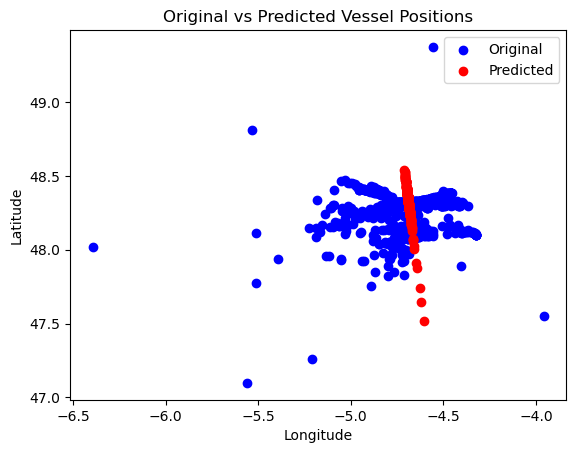

In [27]:
# Scatter plot
plt.scatter(o_geo_df['Longitude'], o_geo_df['Latitude'], color="blue", label='Original')
plt.scatter(geo_df['Longitude'], geo_df['Latitude'], color="red", label='Predicted')

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Original vs Predicted Vessel Positions')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [28]:
# Calculate prediction errors
lon_errors = y_test['lon1'] - lon_predictions
lat_errors = y_test['lat1'] - lat_predictions

o_lon_errors = y_test['lon1'] - original_lon1
o_lat_errors = y_test['lat1'] - original_lat1

# Calculate standard deviation of errors
lon_std_dev = np.std(lon_errors)
lat_std_dev = np.std(lat_errors)

o_lon_std_dev = np.std(o_lon_errors)
o_lat_std_dev = np.std(o_lat_errors)

print(f"Longitude Standard Deviation: {lon_std_dev}")
print(f"Latitude Standard Deviation: {lat_std_dev}")
print(f"Original Longitude Standard Deviation: {o_lon_std_dev}")
print(f"Original Latitude Standard Deviation: {o_lat_std_dev}")

Longitude Standard Deviation: 0.2126427461989684
Latitude Standard Deviation: 0.16018922933957724
Original Longitude Standard Deviation: 0.0
Original Latitude Standard Deviation: 0.0


This result indicates the following:
 - The longitude and latidude for the original shows the "true value".
 - On average, it is suggested from the data that the model has a degree of accuracy of 18.5% from the true longitude and 15.7% degrees from the true latitude. 

In [29]:
#model evaluation
lon_mse = mean_squared_error(y_test['lon1'], lon_predictions)
lat_mse = mean_squared_error(y_test['lat1'], lat_predictions)
print(f"Longitude MSE: {lon_mse}")
print(f"Latitude MSE: {lat_mse}")

Longitude MSE: 0.04526493503526796
Latitude MSE: 0.02628314559210206


The MSE (Mean Squared Error) results could indicate the following:
 - For both longitude and latitude values, the above results indicate that the model´s predicted values are relatively close to the original values, indicating quality and that the model is performing well.

In [30]:
#RMSE evaluation
#perform k-fold cross-validation
lon_predictions_cv = cross_val_predict(lon_model_sel, x_selected, y_selected['lon1'], cv=5)
lat_predictions_cv = cross_val_predict(lat_model_sel, x_selected, y_selected['lat1'], cv=5)

lon_rmse = np.sqrt(mean_squared_error(y_selected['lon1'], lon_predictions_cv))
lat_rmse = np.sqrt(mean_squared_error(y_selected['lat1'], lat_predictions_cv))

print(f"Longitude RMSE: {lon_rmse}")
print(f"Latitude RMSE: {lat_rmse}")


Longitude RMSE: 0.22644512562002597
Latitude RMSE: 0.0652141465574302


The fact that the RMSE results are relatively low for latitude and somewhat low for longitude could suggest that the model is performing somewhat well.

In [31]:
#R-squared evaluation
lon_r2 = r2_score(y_selected['lon1'], lon_predictions_cv)
lat_r2 = r2_score(y_selected['lat1'], lat_predictions_cv)

print(f"Longitude R-squared: {lon_r2}")
print(f"Latitude R-squared: {lat_r2}")

Longitude R-squared: -2.9300212311712586
Latitude R-squared: -2.210264387248147


The above indicates that the model is not a good fit for the current data, the data could be being overfitted, underfitted or simply not capturing the underlying patterns assosiated with the data. This could indicate that there was a problem during feature selection, model selection or another preprocessing problem. This result only implies more that we should try other models and evaluate their results.